# Iterative Solvers

In [102]:
import numpy as np
from scipy import linalg as la
from scipy import sparse

## Problem 1 - 2

In [86]:
def jacobi(A, b, tol=1e-5, maxiter=5000, plot=False):
    
    D = np.diagonal(A)
    Dinv = np.diag( 1/np.diag(A) )
    xk = np.zeros(len(b))
    errors = []
    err = tol+1
    i = 1
    
    while err > tol and i < maxiter:
        
        xkp1 = xk + Dinv @ b - Dinv @ (A @ xk)
        abserr = np.linalg.norm(A@xkp1 - b, np.inf)
        errors.append(abserr)
        err = np.linalg.norm(xkp1 - xk, np.inf)
        i += 1
        xk = xkp1
    
    if plot:
        fig = plt.figure(figsize=(10,7))
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error of Approximation')
        plt.title('Convergence of Jacobi Method')
        plt.semilogy(np.arange(1, i, 1), errors)
    return xk

In [87]:
def diag_dom(n, num_entries=None):
    """
    Generate a strictly diagonally dominant (n, n) matrix.
    
    Parameters:
        n (int): The dimension of the system.
        num_entries (int): The number of nonzero values.
            Defaults to n^(3/2)-n.
            
    Returns:
        A ((n,n) ndarray): A (n, n) strictly diagonally dominant matrix.
        
    """

    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

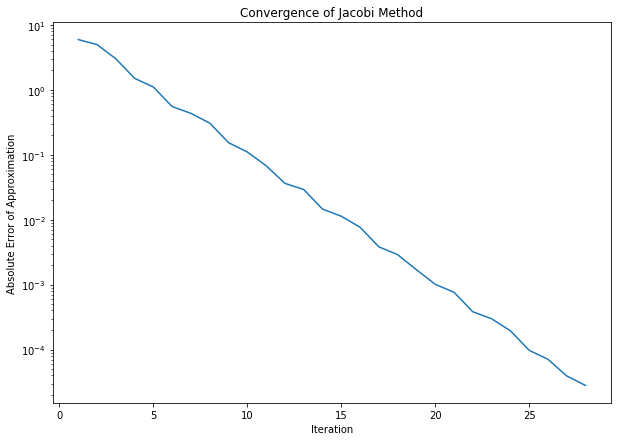

In [88]:
A = diag_dom(10)
b = np.random.random((10,1))
x_j = jacobi(A, b, plot=True)
x_s = la.solve(A, b)

In [89]:
np.allclose(A @ x_j, b)

True

In [91]:
np.allclose(A @ x_s, b)

True

## Problem 3

In [98]:
def gauss_seidal(A, b, tol=1e-5, maxiter=5000, plot=False):
    
    errors = []
    err = tol+1
    i = 1
    n = len(b)
    xk = np.zeros(n)
    
    while err > tol and i < maxiter:
        xkp1 = np.copy(xk)
        for j in range(n):
            xkp1[j] = xk[j] + (1 / A[j, j]) * (b[j] - A[j, :].T @ xk)
        abserr = np.linalg.norm(A@xkp1 - b, np.inf)
        errors.append(abserr)
        err = np.linalg.norm(xkp1 - xk, np.inf)
        i += 1
        xk = xkp1
    
    if plot:
        fig = plt.figure(figsize=(8,5))
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error of Approximation')
        plt.title('Convergence of Gauss Seidal')
        plt.semilogy(np.arange(1, i, 1), errors)
    
    return xk

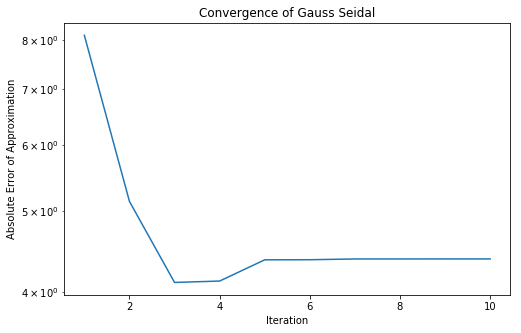

In [99]:
A = diag_dom(10)
b = np.random.random((10,1))
x_j = gauss_seidal(A, b, plot=True)
x_s = la.solve(A, b)

## Problem 4

In [104]:
def gauss_seidal_sparse(A, b, tol=1e-5, maxiter=5000, plot=False):
    
    errors = []
    err = tol+1
    i = 1
    n = len(b)
    xk = np.zeros(n)
    A = A.tocsr()
    
    while err > tol and i < maxiter:
        xkp1 = np.copy(xk)
        for j in range(n):
            rowstart = A.indptr[j]
            rowend = A.indptr[j+1]
            Aix = A.data[rowstart:rowend] @ xk[A.indices[rowstart:rowend]]
            
            xkp1[j] = xk[j] + (1 / A[j, j]) * (b[j] - 1 * Aix)
        
        abserr = np.linalg.norm(A@xkp1 - b, np.inf)
        errors.append(abserr)
        err = np.linalg.norm(xkp1 - xk, np.inf)
        i += 1
        xk = xkp1
    
    if plot:
        fig = plt.figure(figsize=(8,5))
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error of Approximation')
        plt.title('Convergence of Gauss Seidal')
        plt.semilogy(np.arange(1, i, 1), errors)
    
    return xk

array([0.00572694, 0.00208303, 0.00667019, ..., 0.00601861, 0.00372898,
       0.00274991])

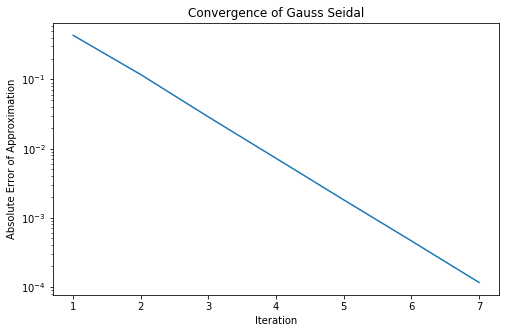

In [105]:
A = sparse.csr_matrix(diag_dom(5000))
b = np.random.random(5000)
gauss_seidal_sparse(A, b, plot=True)

## Problem 5

In [107]:
def gauss_seidal_relax_sparse(A, b, w, tol=1e-5, maxiter=5000, plot=False):
    
    errors = []
    err = tol+1
    i = 1
    n = len(b)
    xk = np.zeros(n)
    A = A.tocsr()
    
    while err > tol and i < maxiter:
        xkp1 = np.copy(xk)
        for j in range(n):
            rowstart = A.indptr[j]
            rowend = A.indptr[j+1]
            Aix = A.data[rowstart:rowend] @ xk[A.indices[rowstart:rowend]]
            
            xkp1[j] = xk[j] + (w / A[j,j]) * (b[j] - 1 * Aix)
        
        abserr = np.linalg.norm(A@xkp1 - b, np.inf)
        errors.append(abserr)
        err = np.linalg.norm(xkp1 - xk, np.inf)
        i += 1
        xk = xkp1
    
    if plot:
        fig = plt.figure(figsize=(10,7))
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error of Approximation')
        plt.title('Convergence of Gauss Seidal')
        plt.semilogy(np.arange(1, i, 1), errors)
    
    return xk, i

In [109]:
A = sparse.csr_matrix(diag_dom(5000))
b = np.random.random(5000)
weights = np.linspace(.1, 1, 10)
its = np.zeros(len(weights))
for index, w in enumerate(weights):
    x_j, i = gauss_seidal_relax_sparse(A, b, w, plot=False)
    its[index] = i

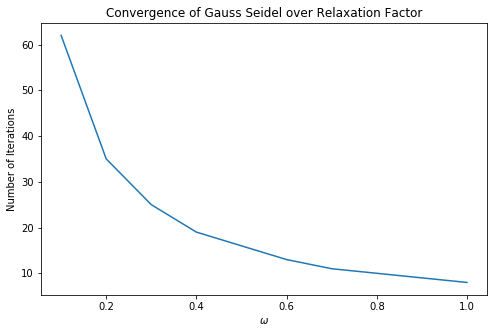

In [110]:
fig = plt.figure(figsize=(8,5))
plt.plot(weights, its)
plt.xlabel(r'$\omega$')
plt.ylabel('Number of Iterations')
plt.title('Convergence of Gauss Seidel over Relaxation Factor')
plt.show()